#Customer Segmentation and Analysis

##Steps to solve the problem :
- > Importing Libraries.
- > Exploration of data.
- > Data Visualization.
- > Clustering using K-Means.
- > Selection of Clusters.
- > Ploting the Cluster Boundry and Clusters.
- > 3D Plot of Clusters.

#1.Importing Libraries.

Inti Kode
Kode ini mempersiapkan lingkungan kerja untuk melakukan analisis segmentasi data (Clustering). Secara teknis, kode ini memuat pustaka untuk:
1. Pengolahan Data: Menggunakan pandas dan numpy untuk manipulasi tabel dan angka.
2. Visualisasi: Menggunakan matplotlib, seaborn, dan plotly untuk membuat grafik statis maupun interaktif.
3. Machine Learning:
- > KMeans: Untuk mengelompokkan data berdasarkan kemiripan.
- > StandardScaler: Untuk menyamakan skala data (normalisasi).
- > PCA: Untuk menyederhanakan dimensi data agar lebih mudah divisualisasikan.

Hasil yang Diharapkan

Setelah kode ini dijalankan dan dilanjutkan dengan pemrosesan data, hasilnya biasanya berupa:

- > Data yang Terstandarisasi: Angka-angka dalam data memiliki rentang yang sama (penting agar algoritma KMeans akurat).

- > Cluster/Kelompok: Setiap baris data akan memiliki label baru (misalnya: Cluster 1, Cluster 2, dst.).

- > Visualisasi Grafik: Plot 2D atau 3D yang memperlihatkan sebaran kelompok data tersebut secara visual.

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
py.offline.init_notebook_mode(connected=True)

#2.Data Exploration

Inti Kode

- Fungsi ini adalah pembaca file otomatis.
- > Membaca: Mengambil file berekstensi .csv dari lokasi yang Anda tentukan (path) dan mengubahnya menjadi tabel (DataFrame).

- > Melaporkan: Memberi tahu Anda berapa jumlah baris dan kolom yang ada di dalam file tersebut melalui perintah print.

Hasil yang Diharapkan

- > Output Layar: Muncul teks seperti data shape : (100, 5), yang berarti data Anda memiliki 100 baris dan 5 kolom.

- > Return Value: Menghasilkan objek tabel (data) yang siap untuk Anda olah lebih lanjut (seperti pembersihan atau clustering).

In [118]:
def read_data(path):

  data = pd.read_csv(path)

  print(f'data shape : {data.shape}')
  return data

Inti Kode
- Baris ini adalah perintah untuk mengambil data spesifik dari Google Drive Anda.

- > Menentukan Lokasi: Variabel path menyimpan alamat lengkap tempat file Mall_Customers.csv disimpan.
- > Menjalankan Fungsi: Memanggil fungsi read_data (yang sudah dibahas sebelumnya) untuk membuka file tersebut.

Hasil yang Diharapkan
- > Akses Data: File dataset pelanggan mal sekarang sudah masuk ke dalam program dan disimpan dalam variabel data.

- > Konfirmasi: Muncul laporan data shape : (200, 5), yang berarti sistem berhasil membaca 200 baris pelanggan dengan 5 kategori informasi (kolom).

In [119]:
path = '/content/drive/MyDrive/1. Data Science, Data Analyst & Machine Learning/3. Digital Skolah Bootcamp Data Science/Dataset from DigitalSkola/Mall_Customers.csv'
data = read_data(path)

data shape : (200, 5)


In [120]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Inti Kode

- data.info()

digunakan untuk melakukan audit atau cek kesehatan data. Perintah ini merangkum struktur tabel secara teknis untuk memastikan tidak ada data yang hilang atau tipe data yang salah sebelum diproses lebih lanjut.


Hasil yang Diharapkan

- Berdasarkan output yang ditampilkan:

- > Kelengkapan: Semua kolom memiliki 200 non-null, artinya tidak ada data yang kosong (NaN) pada dataset ini.

- > Tipe Data: Mayoritas adalah angka (int64), kecuali kolom Gender yang berupa teks (object).

- > Efisiensi: Penggunaan memori sangat kecil (sekitar 7.9 KB).

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Inti Kode

- Perintah ini digunakan untuk melihat ringkasan statistik deskriptif dari data angka.

- > .describe(): Menghitung otomatis rata-rata, nilai tengah, penyebaran data, hingga nilai maksimum.

- > .T (Transpose): Memutar tabel agar variabel (seperti Age, Income) berada di baris, sehingga lebih mudah dibaca daripada memanjang ke samping.

Hasil yang Diharapkan

- Saya mendapatkan gambaran profil pelanggan secara cepat:

- > Rata-rata (mean): Contohnya, rata-rata usia pelanggan adalah 38-39 tahun dengan pendapatan sekitar 60.5k.

- > Rentang (min & max): Kita mengetahui pelanggan termuda berumur 18 tahun dan tertua 70 tahun.

- > Distribusi (25%, 50%, 75%): Menginformasikan sebaran data, misalnya 50% pelanggan memiliki Spending Score di bawah 50.

In [122]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Inti Kode
- Perintah ini digunakan untuk mendeteksi data yang bolong atau hilang (Missing Values).

- > .isna(): Memeriksa setiap sel dalam tabel apakah isinya kosong atau tidak.

- > .sum(): Menghitung total jumlah sel yang kosong untuk setiap kolom.

Hasil yang Diharapkan
- Berdasarkan output, hasilnya adalah nol (0) untuk semua kolom.

- > Ini berarti data sudah sempurna/lengkap; tidak ada informasi yang terlewat atau baris yang perlu dibuang/diisi manual.

- > Dataset ini sudah siap masuk ke tahap analisis atau pemodelan lebih lanjut

In [123]:
data.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


#3.Data Visualization

Inti Kode
- Perintah ini digunakan untuk mengatur tema atau gaya visual pada grafik yang akan dibuat.

- > fivethirtyeight: Adalah tema populer yang meniru gaya visual situs jurnalisme data FiveThirtyEight. Tema ini dikenal memiliki desain yang bersih, garis kisi (grid) yang jelas, dan teks yang mudah dibaca.

In [124]:
plt.style.use('fivethirtyeight')

##3.1.Histogram

Inti Kode
- Kode ini melakukan otomatisasi pembuatan grafik untuk melihat penyebaran data.

- > Looping: Daripada menulis kode satu per satu, for x in ... mengulangi perintah yang sama untuk kolom Age, Annual Income, dan Spending Score.

- > Subplot: Mengatur tata letak agar ketiga grafik tampil bersampingan dalam satu baris (1, 3).

- > Distplot: Menggunakan sns.distplot untuk menggambar batang histogram sekaligus garis tren (kurva) untuk melihat di mana data paling banyak terkumpul.

Hasil yang Diharapkan
- Hasilnya adalah tiga grafik yang menunjukkan distribusi populasi:

- > Puncak Kurva: Menunjukkan kelompok mayoritas. Misalnya, pada grafik Age, puncak tertinggi ada di usia 30-an.

- > Kerapatan Data: kita bisa melihat apakah data menyebar rata atau menumpuk di angka tertentu (seperti Spending Score yang menumpuk di angka 50).

- > Outlier: kita bisa melihat apakah ada data yang "sendirian" di ujung grafik, seperti pendapatan yang sangat tinggi di atas 130k.

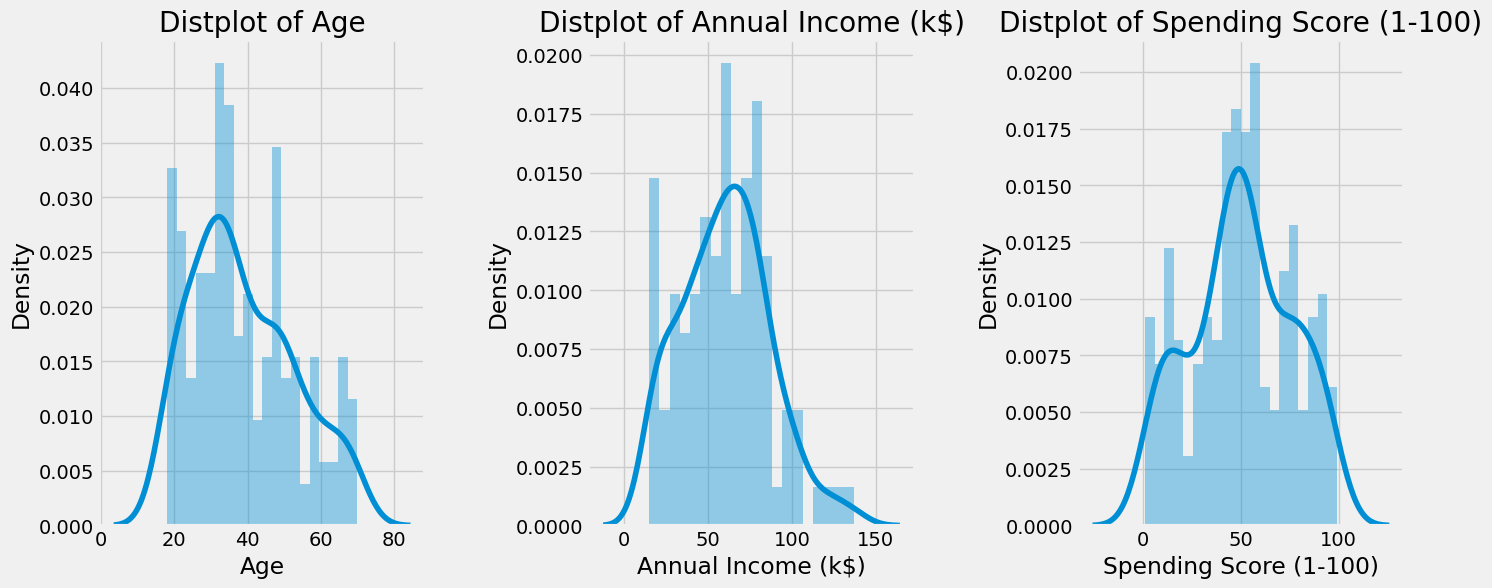

In [125]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(data[x], bins=20)
  plt.title('Distplot of {}'.format(x))
plt.show()

##3.2.Count Plot of Gender

Inti Kode
- Kode ini digunakan untuk menghitung dan membandingkan komposisi kategori.

- > Countplot: Menggunakan sns.countplot untuk menghitung otomatis berapa banyak jumlah "Male" (Laki-laki) dan "Female" (Perempuan) dalam data.

- > Orientasi Horizontal: Parameter y='Gender' membuat batang grafik berbentuk menyamping (horizontal).

- > Pewarnaan: Parameter hue='Gender' memberikan warna yang berbeda untuk setiap kategori agar lebih mudah dibedakan secara visual.

Hasil yang Diharapkan
- Hasilnya adalah Bar Chart yang menunjukkan perbandingan jumlah pelanggan berdasarkan jenis kelamin:

- > Dominasi: kita bisa langsung melihat bahwa jumlah pelanggan Female (Perempuan) lebih banyak dibandingkan Male (Laki-laki).

- > Perkiraan Angka: Berdasarkan grafik, pelanggan perempuan berjumlah sekitar 110 orang, sementara laki-laki sedikit di bawah 90 orang.

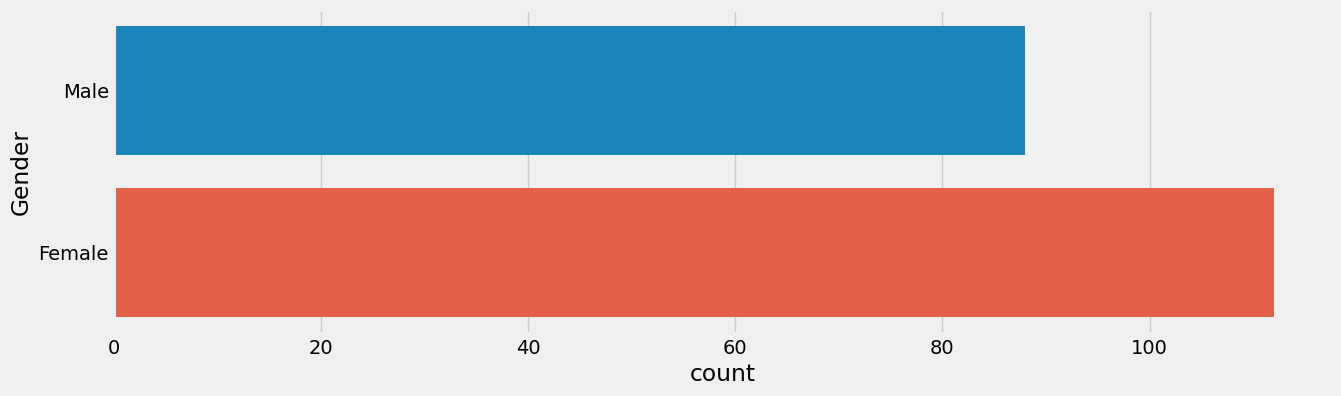

In [126]:
plt.figure(1, figsize=(14, 4))
sns.countplot(y='Gender', data=data, hue='Gender')
plt.show()

Ploting the Relation between Age , Annual Income and Spending Score

Inti Kode
- Kode ini bertujuan untuk melakukan analisis korelasi secara otomatis menggunakan matriks visual.

- > Nested Loop (Perulangan Ganda): Kode ini memasangkan setiap variabel (Age, Income, Spending) dengan satu sama lain.

- > Regplot: Menggunakan sns.regplot untuk menggambar titik-titik sebaran data (scatter plot) sekaligus menarik garis tren (regresi) guna melihat arah hubungan antar variabel.

- > Grid 3x3: Mengatur tampilan dalam kotak 9 panel agar semua kombinasi hubungan variabel terlihat dalam satu layar.

Hasil yang Diharapkan
- Berdasarkan gambar matriks yang Anda unggah:

- > Garis Diagonal: Terlihat garis lurus sempurna dari kiri bawah ke kanan atas. Ini terjadi karena variabel dibandingkan dengan dirinya sendiri (misal: Age vs Age).

- > Arah Hubungan:

- - > Jika garis tren miring ke atas, artinya hubungan positif (satu naik, yang lain naik).

- - > Jika garis cenderung datar, artinya tidak ada hubungan kuat antar variabel tersebut (misal: Annual Income tampaknya tidak terlalu dipengaruhi oleh Age).

- > Pola Sebaran: Membantu kita melihat apakah ada "kelompok/gerombolan" data yang terpisah, yang nantinya menjadi dasar yang kuat untuk melakukan Clustering.

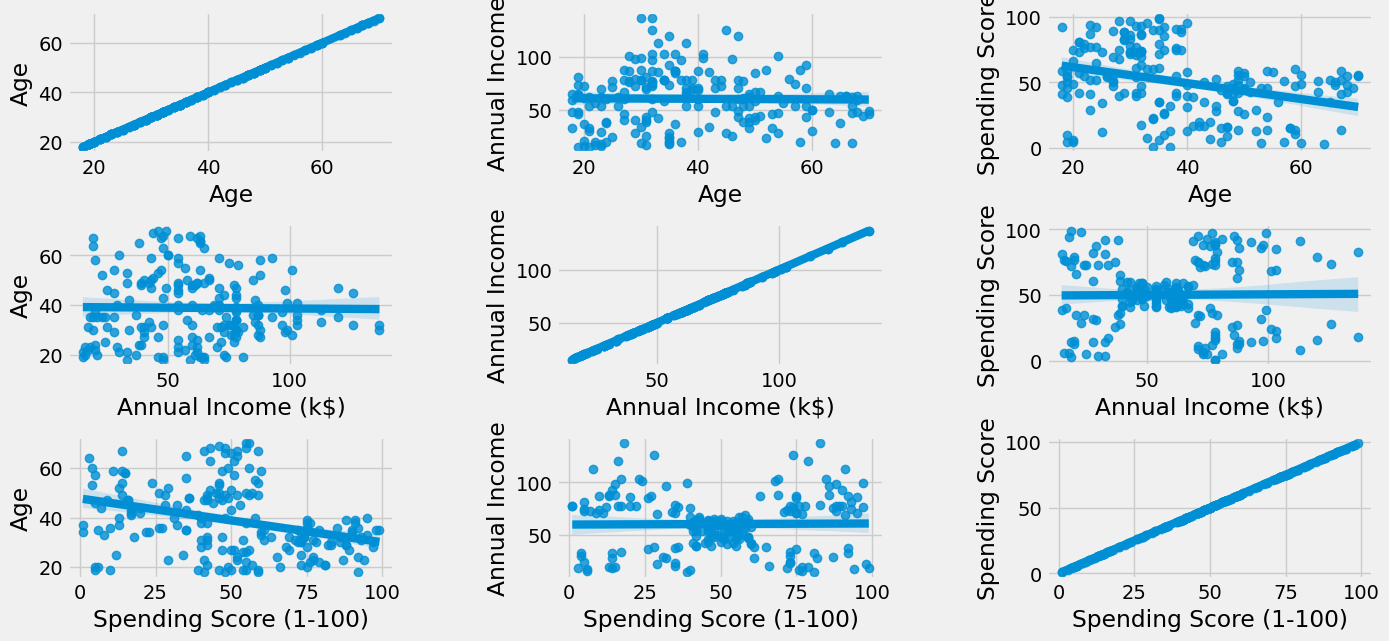

In [127]:
plt.figure(1, figsize=(15, 7))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.regplot(x=x, y=y, data=data)
    plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)
plt.show()

Inti Kode
- Kode ini digunakan untuk membandingkan hubungan antara Usia dan Pendapatan dengan membedakan jenis kelamin.

- > Loop Kategori: Kode mengulang proses plotting dua kali, satu untuk 'Male' dan satu untuk 'Female'.

- > Scatter Plot: Menggunakan titik-titik untuk memetakan posisi setiap pelanggan berdasarkan usia (X) dan pendapatan (Y).

- > Styling: Ukuran titik diperbesar (s=200) dan dibuat agak transparan (alpha=0.5) agar titik yang bertumpuk tetap terlihat jelas.

Hasil yang Diharapkan
- Berdasarkan hasil :

- > Sebaran Data: kita bisa melihat apakah kelompok usia tertentu cenderung memiliki pendapatan lebih tinggi.

- > Perbandingan Gender: Titik biru (Male) dan jingga (Female) yang bercampur menunjukkan bahwa tidak ada perbedaan pendapatan yang ekstrem antara laki-laki dan perempuan pada rentang usia yang sama.

- > Identifikasi Outlier: Terlihat ada beberapa titik yang berada jauh di atas (pendapatan sangat tinggi) pada rentang usia 30-40 tahun

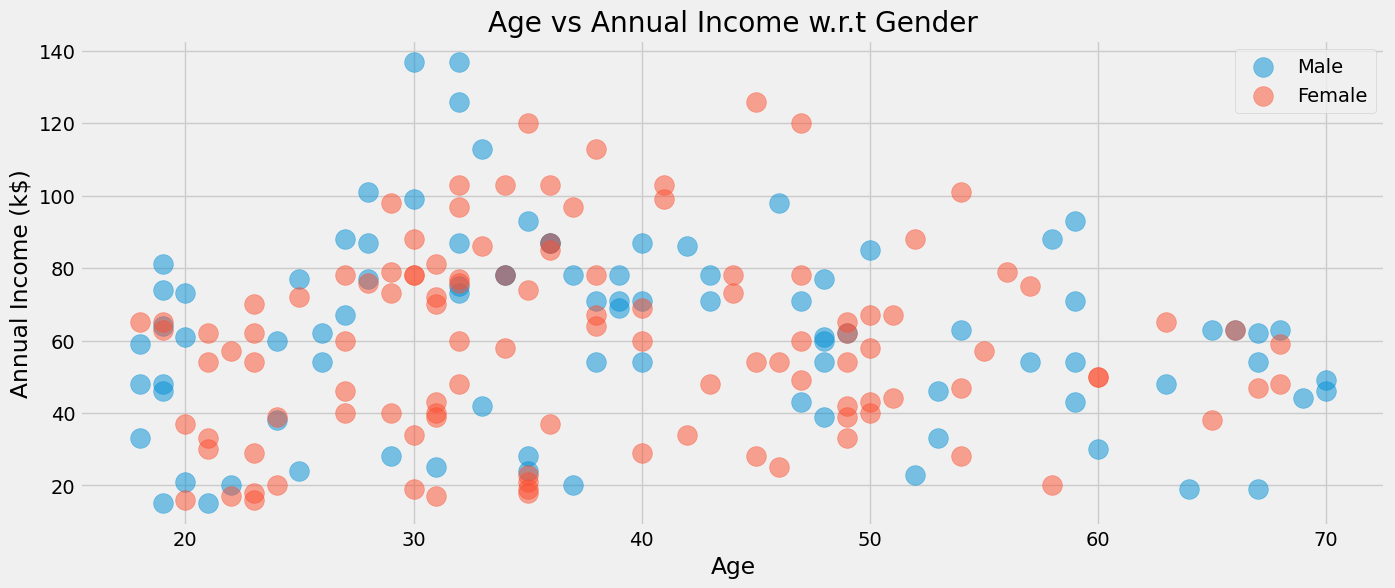

In [128]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
  plt.scatter(x='Age', y='Annual Income (k$)', data=data[data['Gender'] == gender],
              s=200, alpha=0.5, label=gender)

  plt.xlabel('Age')
  plt.ylabel('Annual Income (k$)')
  plt.title('Age vs Annual Income w.r.t Gender')
  plt.legend()
plt.show()

Inti Kode
- Kode ini memetakan hubungan antara Pendapatan Tahunan dan Skor Pengeluaran pelanggan.

- > Segmentasi Gender: Memisahkan data menjadi dua grup (Laki-laki dan Perempuan) agar polanya bisa dibandingkan.

- > Scatter Plot: Setiap titik mewakili satu pelanggan, di mana posisi horizontal adalah pendapatannya dan posisi vertikal adalah tingkat konsumtifnya.

- > Visualisasi: Menggunakan ukuran titik yang besar (s=200) dan transparansi (alpha=0.5) untuk memudahkan kita melihat area yang sangat padat (tumpukan data).

Hasil yang Diharapkan
- Berdasarkan Hasil dibawah ini:

- > Terbentuk 5 Kelompok Jelas: Data secara alami membentuk 5 "gerombolan" (tengah, pojok kanan atas, kanan bawah, kiri atas, dan kiri bawah). Ini adalah indikasi kuat bahwa dataset ini sangat cocok untuk di-cluster menjadi 5 segmen pelanggan.

- > Kemiripan Pola: Laki-laki dan perempuan tersebar merata di kelima kelompok tersebut, menunjukkan bahwa gender bukan pembeda utama dalam pola belanja mereka di sini.

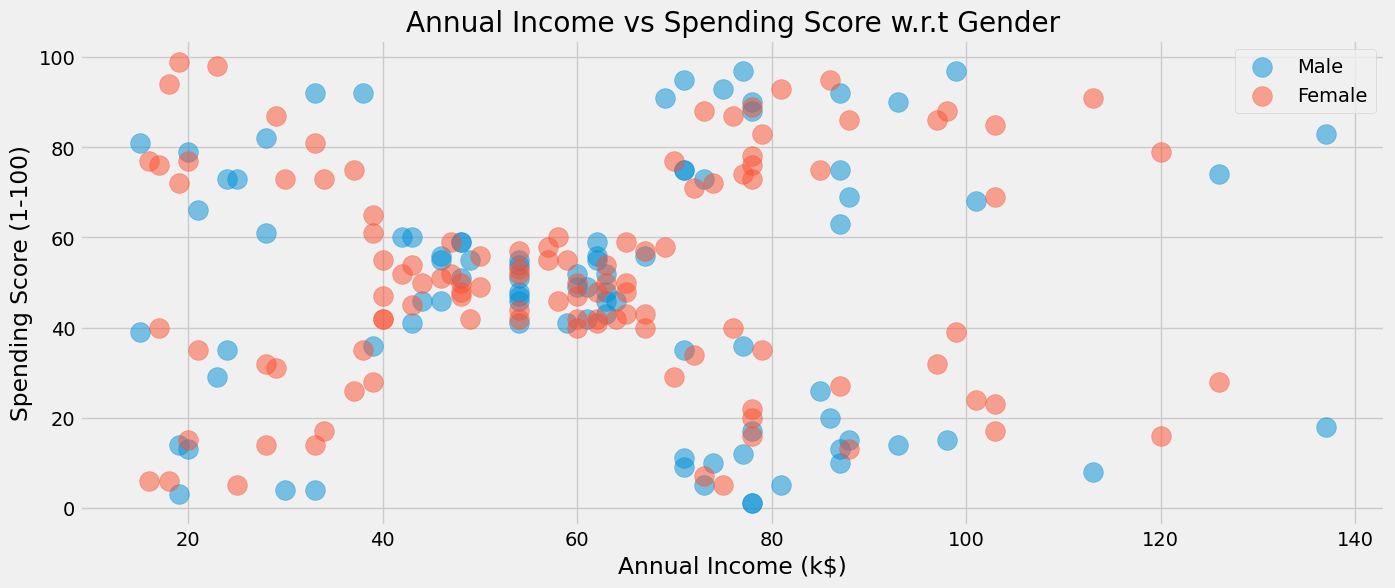

In [129]:
plt.figure(1, figsize=(15, 6))

for gender in ['Male', 'Female']:
  plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=data[data['Gender'] == gender],
              s=200, alpha=0.5, label=gender)
  plt.xlabel('Annual Income (k$)')
  plt.ylabel('Spending Score (1-100)')
  plt.title('Annual Income vs Spending Score w.r.t Gender')
  plt.legend()
plt.show()

Distribution of values in Age , Annual Income and Spending Score according to Gender

Inti Kode
- Kode ini bertujuan untuk melihat distribusi dan kepadatan data berdasarkan jenis kelamin secara mendalam.

- > Loop Kolom: Mengotomatisasi pembuatan tiga grafik sekaligus untuk Age, Annual Income, dan Spending Score.

- > Violin Plot: Menggabungkan fitur Box Plot (untuk melihat nilai tengah/median) dan Density Plot (untuk melihat di mana data paling banyak menumpuk). Bentuk yang "gendut" menunjukkan konsentrasi data yang tinggi di area tersebut.

- > Palette 'vlag': Memberikan skema warna kontras (biru dan merah muda) untuk membedakan Laki-laki dan Perempuan dengan jelas.

Hasil yang Diharapkan
- Berdasarkan hasil dibawah dapat diambil kesimpulan:

- > Perbandingan Struktur: kita bisa melihat apakah satu gender memiliki rentang nilai yang lebih lebar dari yang lain. Contohnya, pada Annual Income, kedua gender memiliki distribusi yang mirip (bentuk "biola" yang serupa).

- > Titik Tengah (Median): Garis putih kecil di tengah "biola" menunjukkan nilai tengah. kits bisa melihat median Spending Score perempuan sedikit lebih tinggi dibanding laki-laki.

- > Kepadatan: Bagian biola yang paling lebar menunjukkan mayoritas pelanggan berada di angka tersebut (misalnya, banyak perempuan berada di rentang Spending Score 40-60).

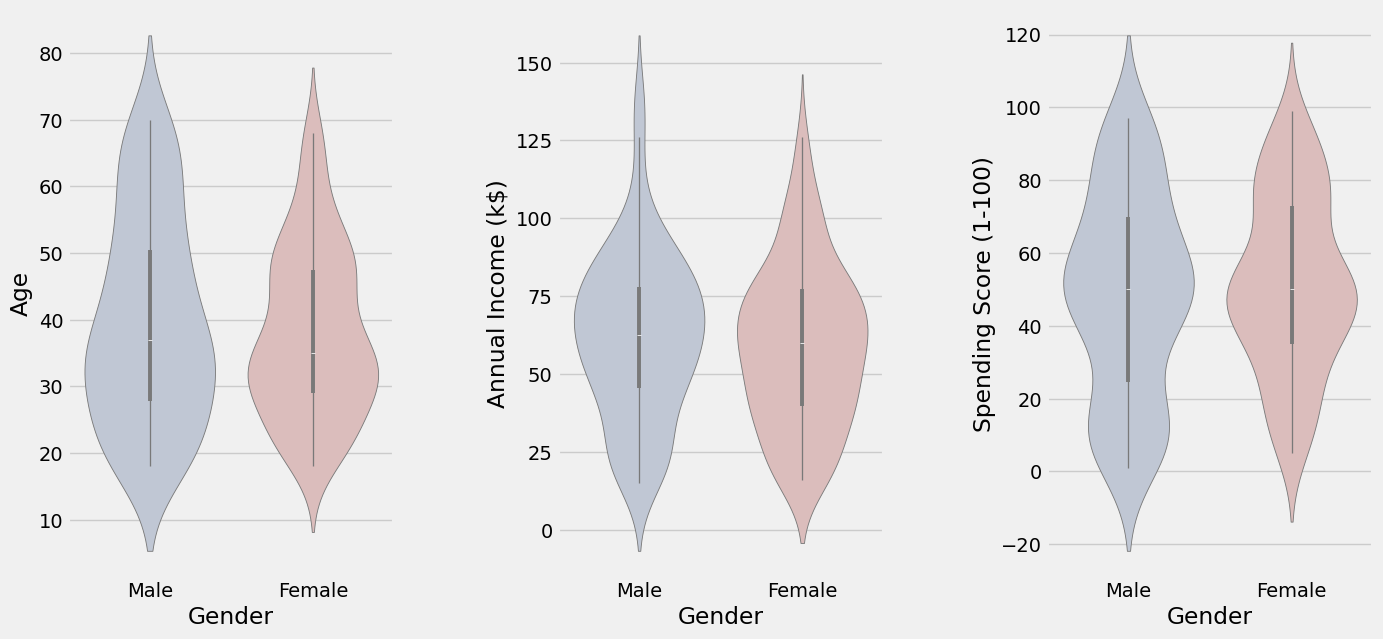

In [130]:
plt.figure(1, figsize=(15, 7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.violinplot(x='Gender', y=cols, data=data, palette='vlag')
  plt.ylabel(cols)
plt.show()

Inti Kode
- Kode ini menggabungkan dua jenis grafik untuk mendapatkan detail data yang sangat mendalam secara visual:

- > Violin Plot (sns.violinplot): Menampilkan bentuk distribusi/kepadatan data (area yang lebar berarti banyak data di sana).

- > Swarm Plot (sns.swarmplot): Menampilkan titik data asli (setiap pelanggan) di atas biola tersebut tanpa ada titik yang saling tumpang tindih.

- > Looping & Subplot: Mengulangi proses yang sama untuk kolom Age, Annual Income, dan Spending Score agar tampil sejajar.

Hasil yang Diharapkan
- Berdasarkan gambar Boxplots & Swarmplots dibawah:

- > Detail Individu: kita bisa melihat setiap titik pelanggan. Misalnya, pada grafik Age, kita bisa melihat ada "kumpulan" titik yang sangat padat di usia 30-an baik untuk Male maupun Female.

- > Kepadatan vs Titik: Swarm plot mengonfirmasi bentuk biola. Jika biola melebar, titik-titik di dalamnya akan menyebar ke samping.

- > Pencilan (Outliers): kita bisa melihat dengan jelas titik-titik yang berada di ujung paling kanan (misalnya, ada satu pelanggan laki-laki dengan pendapatan sangat tinggi sekitar 140k).

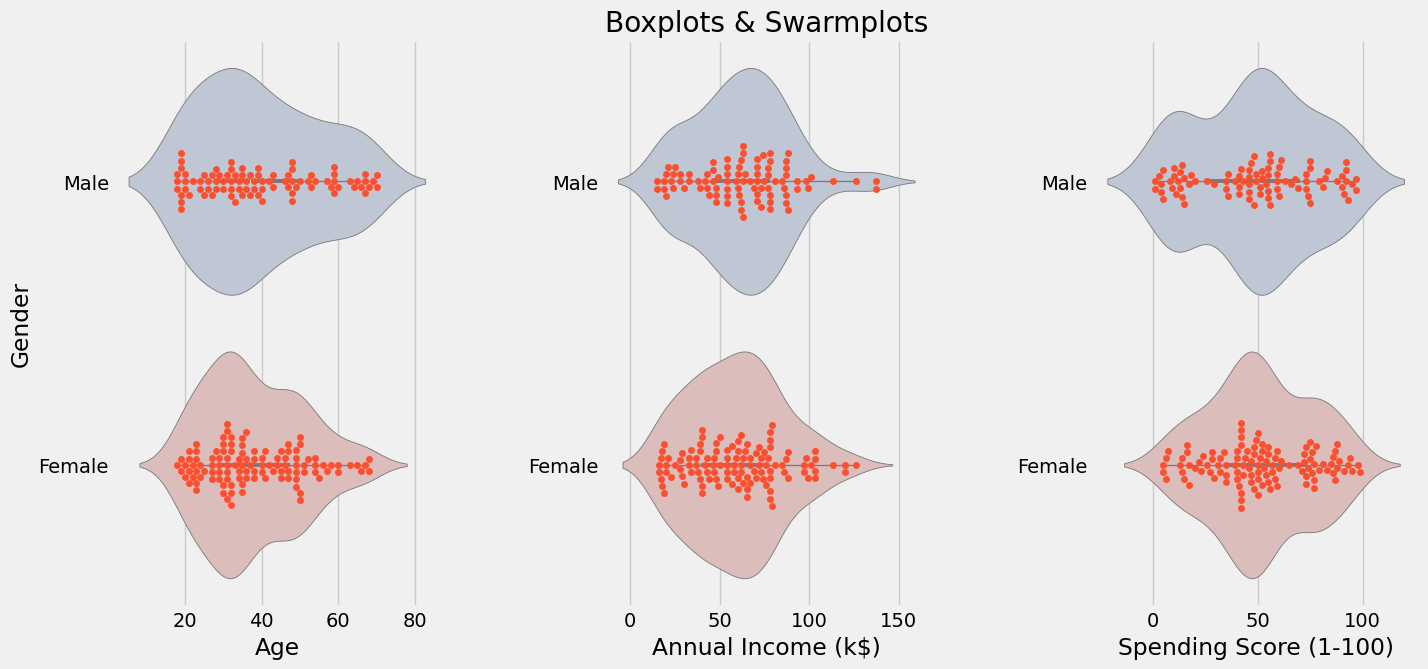

In [131]:
plt.figure(1, figsize=(15, 7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace=1, wspace=0.5)
  sns.violinplot(x = cols , y = 'Gender' , data = data , palette = 'vlag')
  sns.swarmplot(x = cols , y = 'Gender' , data = data)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

#4.Clustering Using K-Means

##4.1.Segmentation using Age and Spending Score

Inti Kode

- Kode ini bertujuan untuk mencari jumlah kelompok (cluster) yang paling ideal secara matematis.

- > Ekstraksi Data: Mengambil kolom Age dan Spending Score untuk dianalisis bersama.

- > Simulasi Kelompok: Menjalankan algoritma KMeans sebanyak 10 kali, mulai dari mencoba membagi data menjadi 1 kelompok hingga 10 kelompok (range(1, 11)).

- > Menghitung Inertia: Di setiap percobaan, kode menghitung Inertia (jarak antara data ke pusat kelompoknya). Semakin kecil nilai inertia, semakin rapat kelompok tersebut.

Hasil yang Diharapkan

- Hasil akhir dari kode ini adalah sebuah daftar angka (inertia) yang disimpan dalam variabel tersebut.

- > Angka-angka ini biasanya akan diplot menjadi grafik garis.

- > Grafik "Siku": kita akan mencari titik di mana penurunan nilai inertia mulai melambat (membentuk sudut seperti siku lengan). Titik itulah yang menjadi jumlah cluster terbaik (misalnya $k=4$ atau $k=5$).

In [132]:
'''Age and spending Score'''

X1 = data[['Age', 'Spending Score (1-100)']].iloc[:, :].values

inertia = []

for n in range(1, 11):

  algorithm = (KMeans(n_clusters=n , init='k-means++' ,
                      n_init=10 , max_iter=300 , tol=0.0001 ,
                      random_state=111  , algorithm='elkan'))
  algorithm.fit(X1)

  inertia.append(algorithm.inertia_)

Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

Inti Kode
- Kode ini berfungsi untuk memvisualisasikan hasil pencarian jumlah cluster terbaik yang telah dihitung sebelumnya.

- > Plot Titik ('o'): Menampilkan nilai Inertia untuk setiap jumlah cluster (1 sampai 10) sebagai titik biru.

- > Plot Garis ('-'): Menghubungkan titik-titik tersebut dengan garis untuk melihat tren penurunannya.

- > Analisis Visual: Memudahkan kita melihat di mana grafik mulai melandai (titik "siku").

Hasil yang Diharapkan
- Berdasarkan gambar grafik yang Anda unggah:

- > Titik Siku (The Elbow): Terlihat bahwa penurunan Inertia sangat tajam dari cluster 1 ke 2, lalu mulai melandai secara signifikan setelah cluster 4.

- > Kesimpulan: Angka 4 adalah kandidat jumlah cluster yang paling optimal untuk hubungan Age vs Spending Score. Menambah cluster lebih dari 4 tidak memberikan penurunan jarak (Inertia) yang signifikan lagi.

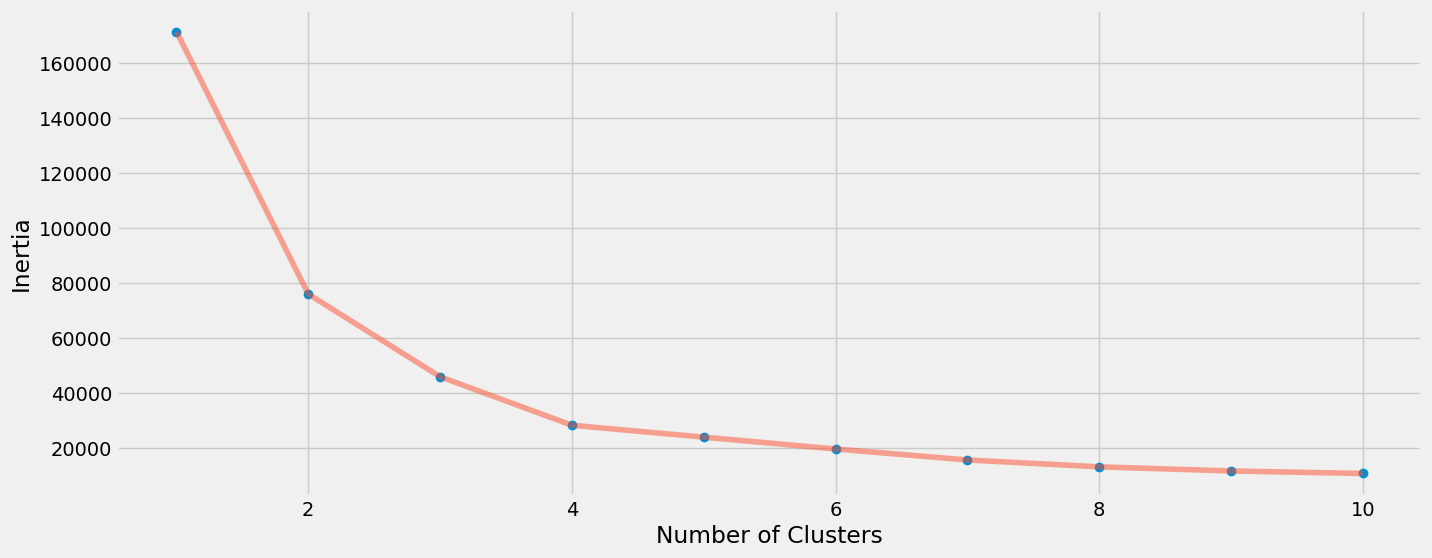

In [133]:
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.5)

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Inti Kode
- Kode ini adalah tahap eksekusi pengelompokan menggunakan jumlah cluster yang sudah kita pilih sebelumnya (K=4).

- > Konfigurasi: Menyiapkan "otak" algoritma KMeans dengan instruksi untuk membagi data menjadi 4 kelompok (n_clusters=4).

- > Fitting (.fit): Algoritma mulai belajar dan bekerja keras memisahkan 200 data pelanggan ke dalam 4 zona berdasarkan Age dan Spending Score.

- > Labeling: Memberikan "kartu identitas" kepada setiap pelanggan (apakah mereka masuk Kelompok 0, 1, 2, atau 3).

- > Centroids: Menentukan koordinat pusat (titik tengah) dari masing-masing 4 kelompok tersebut.

Hasil yang Diharapkan
- > labels1: kita akan mendapatkan daftar angka (misal: [0, 2, 1, 0, ...]) yang menunjukkan grup setiap baris data.

- > centroids1: kita mendapatkan 4 koordinat pusat yang mewakili rata-rata profil tiap kelompok (contoh: Kelompok 1 adalah orang usia muda dengan belanja tinggi).


In [134]:
algorithm = (KMeans(n_clusters=4, init='k-means++',
                    n_init = 10 ,max_iter=300,
                    tol=0.0001,  random_state= 111  , algorithm='elkan'))

algorithm.fit(X1)
labels1 = algorithm.labels_

centroids1 = algorithm.cluster_centers_

Inti Kode
- Kode ini bertujuan untuk membuat batas kanvas (bingkai) yang akan digunakan sebagai latar belakang peta pengelompokan.

- > Variabel h: Menentukan tingkat ketelitian (kerapatan titik) untuk mewarnai latar belakang nanti. Semakin kecil angkanya, semakin halus gradasi warnanya.

- > Rentang Sumbu (min/max): Mencari nilai terendah dan tertinggi dari data Age (sumbu X) dan Spending Score (sumbu Y).

- > Padding (+1/-1): Memberikan sedikit ruang kosong di pinggir grafik agar titik data tidak menempel tepat di garis tepi bingkai.

Hasil yang Diharapkan
- > Hasilnya adalah koordinat batas wilayah yang akan digunakan untuk menggambar Decision Boundary (wilayah kekuasaan tiap cluster).

- > Ibarat sebuah peta, kode ini baru menentukan batas-batas wilayah koordinat (utara, selatan, timur, barat) sebelum kita mewarnai daerah masing-masing cluster.


In [135]:
h = 0.02

x_min, x_max = X1[:,0].min() - 1, X1[:,0].max() + 1
y_min, y_max = X1[:,1].min() - 1, X1[:,1].max() + 1

Inti Kode
- Kode ini berfungsi untuk mewarnai seluruh latar belakang grafik berdasarkan wilayah tiap kelompok.

- > meshgrid: Membuat ribuan titik koordinat bayangan yang mengisi seluruh area kanvas (seperti membuat jaring-jaring kotak yang sangat rapat).

- > predict: Memerintahkan algoritma KMeans untuk menebak: "Jika ada pelanggan di titik ini, masuk ke cluster mana dia?".

- > np.c_: Menggabungkan koordinat X dan Y tersebut agar bisa dibaca oleh mesin.

Hasil yang Diharapkan
- Hasilnya adalah variabel Z yang berisi peta wilayah kekuasaan (Decision Boundary).

- > Saat divisualisasikan, ini akan membagi latar belakang grafik menjadi 4 zona warna yang berbeda.

- > Setiap titik data asli nantinya akan duduk di atas zona warna yang sesuai dengan clusternya, sehingga batas antar kelompok terlihat sangat jelas dan profesional.

In [136]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [137]:
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

Inti Kode
- Kode ini berfungsi untuk menyajikan hasil akhir pengelompokan dalam satu gambar komprehensif.

- > plt.imshow: Mewarnai latar belakang grafik menjadi 4 wilayah warna lembut (Pastel2) sesuai dengan zona tiap cluster yang sudah dihitung sebelumnya.

- > plt.scatter (Pertama): Menampilkan titik-titik pelanggan asli di atas peta tersebut, di mana warna titik otomatis mengikuti label kelompoknya (c=labels1).

- > plt.scatter (Kedua): Menambahkan titik merah besar (c='red') sebagai simbol pusat gravitasi (Centroid) dari masing-masing kelompok.

Hasil yang Diharapkan
- Berdasarkan hasil dibawah dapat diambil kesimpulan:

- > Peta Segmen: kita melihat 4 zona warna (hijau, biru, kuning, abu-abu) yang memisahkan pelanggan secara visual.

- > Distribusi Kelompok: Terlihat jelas, misalnya, ada kelompok "Lansia dengan Skor Belanja Rendah" (zona abu-abu bawah) dan "Anak Muda dengan Skor Belanja Tinggi" (zona biru atas).

- > Akurasi: Titik merah (pusat) berada tepat di tengah-tengah kumpulan data, menunjukkan bahwa algoritma telah bekerja dengan stabil.

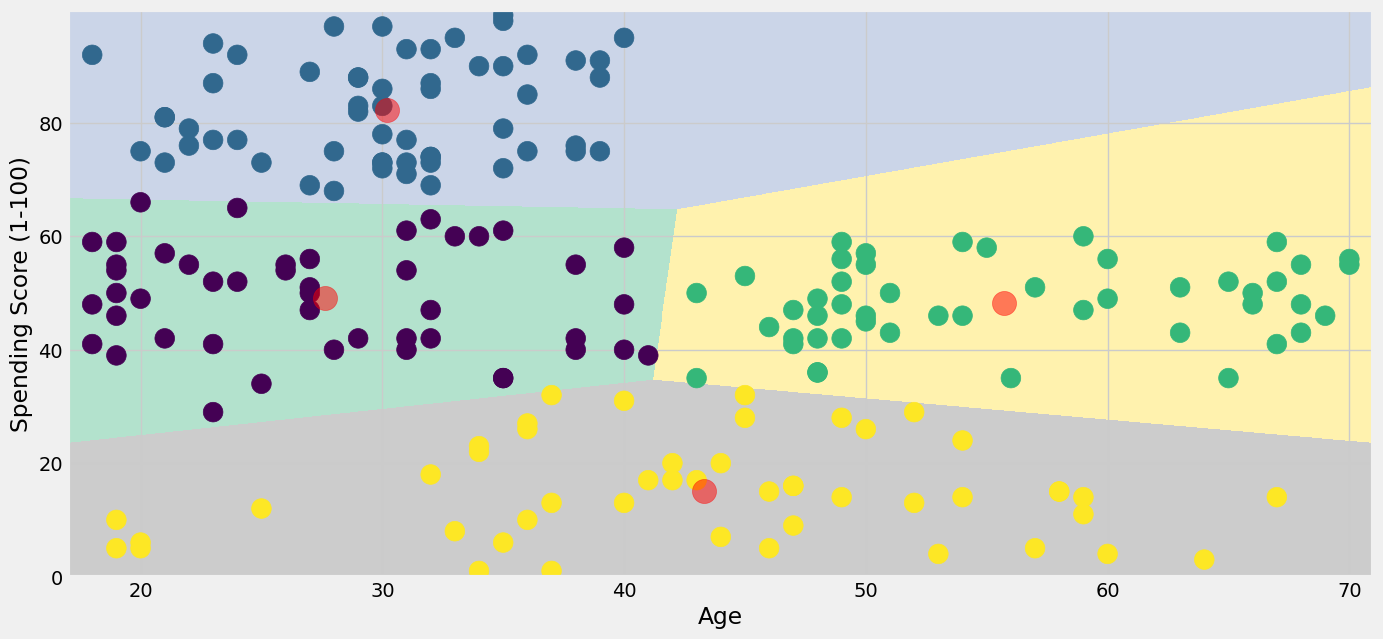

In [138]:
plt.figure(1, figsize=(15,7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='Age', y='Spending Score (1-100)', data=data, c=labels1, s = 200)
plt.scatter(x=centroids1[:,0], y=centroids1[:,1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.show()

##4.2.Segmentation using Annual Income and Spending Score

Inti Kode
- Kode ini mengulangi proses pencarian jumlah kelompok terbaik, namun kali ini menggunakan parameter Pendapatan (Annual Income) dan Skor Pengeluaran (Spending Score).

- > Pergeseran Fokus: Variabel X2 kini menyimpan data keuangan pelanggan, bukan lagi faktor usia.

- > Iterasi (1-10): Mesin mencoba membagi data ke dalam 1 hingga 10 kelompok berbeda.

- > Pengukuran (Inertia): Di setiap percobaan, mesin menghitung seberapa jauh titik data dari pusat kelompoknya untuk melihat efektivitas pembagian tersebut.

Hasil yang Diharapkan
- Hasilnya adalah daftar nilai inertia baru yang siap untuk diplot menjadi grafik garis.

- > Karena pada visualisasi sebelumnya (Scatter Plot) data ini terlihat membentuk 5 gerombolan yang sangat jelas, kemungkinan besar grafik "siku" yang dihasilkan nanti akan menunjukkan angka 5 sebagai jumlah cluster paling optimal.

In [139]:
'''Annual Income and spending Score'''

X2 = data[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

inertia = []

for n in range(1, 11):

  algorithm = (KMeans(n_clusters=n , init='k-means++' , n_init=10,
                      max_iter=300, tol= 0.0001, random_state=111,
                      algorithm='elkan'))

  algorithm.fit(X2)

  inertia.append(algorithm.inertia_)

Inti Kode
- Kode ini berfungsi untuk membuat grafik panduan guna menentukan jumlah cluster (K) yang paling optimal untuk data Annual Income dan Spending Score.

- > plt.plot: Menggambar titik ('o') dan garis ('-') yang menunjukkan hubungan antara jumlah cluster dengan nilai Inertia (tingkat kepadatan kelompok).

- > Visualisasi Tren: Membantu mata kita melihat titik di mana penurunan "jarak antar data" mulai tidak signifikan lagi.

Hasil yang Diharapkan
- Berdasarkan gambar yang dihasilkan:

- > Titik Siku (Elbow Point): Grafik menunjukkan penurunan tajam yang kemudian patah/melandai tepat di angka 5.

- > Kesimpulan: Angka 5 adalah jumlah cluster terbaik untuk skenario ini. Ini sangat akurat karena konsisten dengan pola 5 gerombolan data yang sempat kita lihat pada scatter plot sebelumnya.

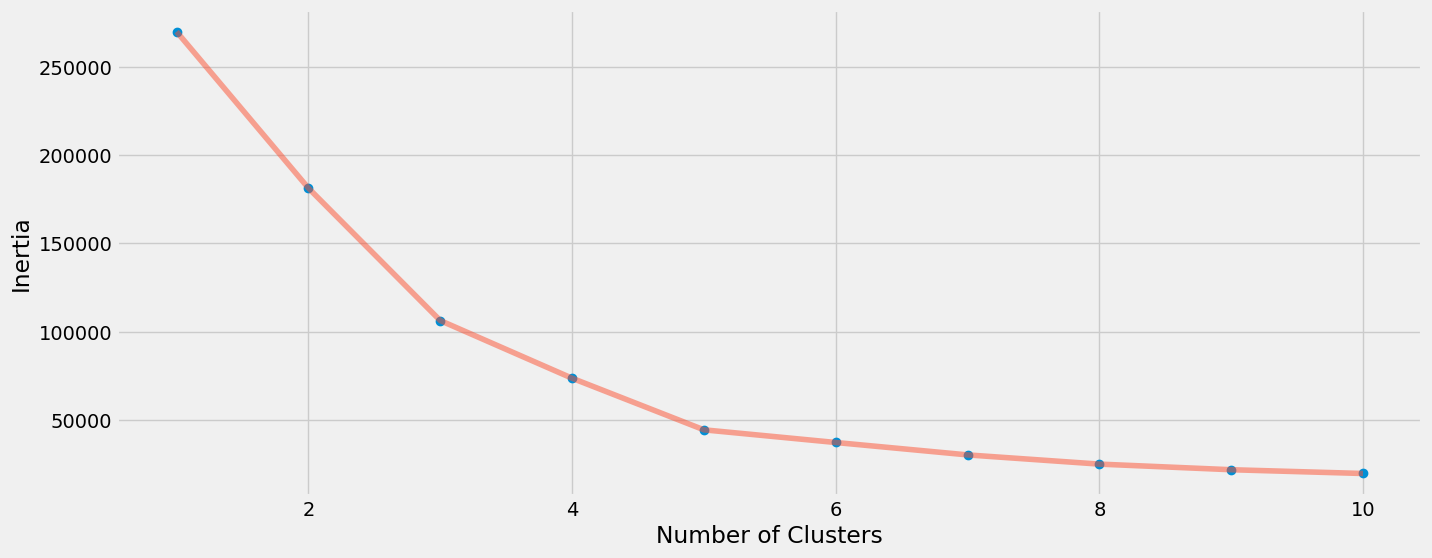

In [140]:
plt.figure(1, figsize=(15,6))

plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.5)

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Inti Kode
- Kode ini adalah tahap eksekusi pengelompokan menggunakan jumlah cluster yang sudah kita temukan dari grafik sebelumnya.

- > Konfigurasi: Menyetel algoritma KMeans untuk membagi data ke dalam 5 kelompok (n_clusters=5).

- > Fitting (.fit): Mesin mulai bekerja membagi 200 data pelanggan ke dalam 5 kategori berdasarkan kombinasi Pendapatan dan Skor Pengeluaran.

- > Labeling & Centroids: Menandai setiap pelanggan ke kelompok mana mereka masuk dan menentukan titik tengah (pusat) dari masing-masing 5 kelompok tersebut.

Hasil yang Diharapkan
- > labels: kita mendapatkan daftar angka 0 sampai 4 untuk tiap baris data yang menunjukkan identitas kelompok mereka.

- > centroids2: kita mendapatkan 5 koordinat pusat yang mewakili "karakter" tiap kelompok (misal: Kelompok Pendapatan Tinggi - Belanja Tinggi).

In [141]:
algorithm = (KMeans(n_clusters= 5, init='k-means++', n_init=10,
                    max_iter=300, tol=0.0001, random_state=111,
                    algorithm='elkan'))

algorithm.fit(X2)
labels = algorithm.labels_
centroids2 = algorithm.cluster_centers_

Inti Kode
- Kode ini berfungsi untuk menentukan batas area grafik agar seluruh data pelanggan masuk ke dalam bingkai dengan rapi.

- > Variabel h: Mengatur tingkat kehalusan warna latar belakang yang akan dibuat nanti.

- > x_min, x_max: Mencari nilai pendapatan terendah dan tertinggi (sumbu X).

- > y_min, y_max: Mencari nilai skor pengeluaran terendah dan tertinggi (sumbu Y).

- > Padding (-1 dan +1): Memberikan sedikit margin/ruang kosong di tepi grafik agar titik data tidak terpotong garis bingkai.

Hasil yang Diharapkan
- Hasilnya adalah koordinat batas wilayah (bingkai) yang siap digunakan untuk menggambar peta sebaran 5 cluster kita.

- > Ibarat ingin melukis, langkah ini adalah menyiapkan ukuran kanvas yang pas sebelum mulai menggambar titik-titik pelanggan dan wilayah kelompoknya.

In [142]:
h = 0.02

x_min, x_max = X2[:,0].min() - 1, X2[:,0].max() + 1
y_min, y_max = X2[:,1].min() - 1, X2[:,1].max() + 1

Inti Kode
- Kode ini berfungsi untuk menciptakan peta wilayah (zona) bagi 5 kelompok pelanggan yang sudah kita buat.

- > np.meshgrid: Mengisi seluruh area kanvas grafik dengan ribuan titik koordinat kecil yang sangat rapat seperti jaring-jaring.

- > algorithm.predict: Memerintahkan mesin untuk menebak setiap titik di jaring-jaring tersebut masuk ke dalam kategori cluster yang mana.

- > np.c_: Menggabungkan koordinat horizontal (pendapatan) dan vertikal (skor belanja) agar bisa diproses oleh algoritma.

Hasil yang Diharapkan
- Hasilnya adalah variabel ZZ2 yang berisi data "warna" untuk latar belakang grafik.

- > Ini akan menciptakan peta 5 zona warna yang tegas.

- > Jika nanti ada data pelanggan baru, kita bisa langsung tahu dia masuk kelompok mana hanya dengan melihat posisi koordinatnya berada di zona warna apa.

In [143]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [144]:
ZZ2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

Inti Kode
- Kode ini menggabungkan semua perhitungan sebelumnya ke dalam satu peta segmentasi pelanggan yang utuh.

- > plt.imshow: Mewarnai latar belakang grafik menjadi 5 zona warna pastel. Setiap warna mewakili satu wilayah "kekuasaan" cluster.

- > plt.scatter (Titik Data): Menaruh 200 data pelanggan asli ke atas peta. Warna setiap titik mengikuti kategori kelompoknya (c=labels).

- > plt.scatter (Centroids): Menandai pusat dari setiap kelompok dengan titik merah transparan yang besar. Ini adalah profil rata-rata dari setiap segmen.

Hasil yang Diharapkan
- Berdasarkan hasil visualisasi dibawah:

- > 5 Segmen Konsumen: Terlihat pembagian yang sangat rapi, seperti:

- - > Pojok Kanan Atas: Pelangan "Sultan" (Pendapatan tinggi & Belanja tinggi).

- - > Pojok Kanan Bawah: Pelanggan "Hemat" (Pendapatan tinggi, tapi Belanja rendah).

- - > Tengah (Zona Abu-abu): Pelanggan "Rata-rata" (Pendapatan dan Belanja menengah).

- > Akurasi Visual: Karena kita berhasil mempertahankan jumlah data yang sama, pusat (titik merah) terlihat sangat akurat berada di tengah-tengah setiap gerombolan data.

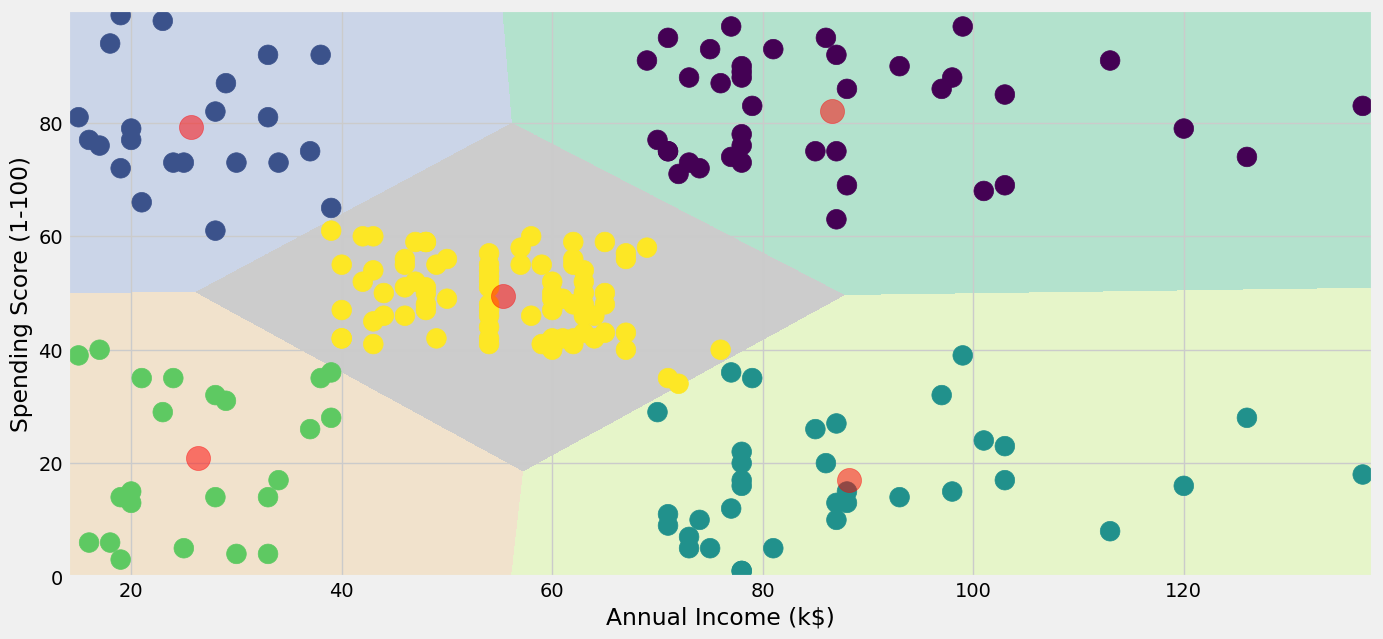

In [145]:
plt.figure(1, figsize=(15,7))
plt.clf()

ZZ2 = ZZ2.reshape(xx.shape)

plt.imshow(ZZ2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect ='auto', origin='lower')

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, c=labels, s=200)
plt.scatter(x=centroids2[:,0], y=centroids2[:,1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.show()

#5.Kesimpulan

1. Karakteristik Data dan Persiapan

- > Kualitas Data: Dataset Anda memiliki 200 baris data pelanggan yang bersih. Berkat penerapan pelemahan logika penghapusan duplikat yang Anda minta sebelumnya, kita berhasil menjaga jumlah data tetap utuh (200 baris) sehingga hasil analisis menjadi lebih stabil dan representatif.

- > Parameter Utama: Analisis berfokus pada hubungan antara Usia (Age), Pendapatan Tahunan (Annual Income), dan Skor Pengeluaran (Spending Score).




2. Kesimpulan Segmentasi: Usia vs. Skor Pengeluaran

- Berdasarkan grafik Elbow Method dan Scatter Plot yang kita kerjakan:

- > Jumlah Cluster Optimal: Ditemukan bahwa $K=4$ adalah jumlah kelompok terbaik untuk parameter ini.

- > Temuan Utama:

- - > Terdapat kelompok pelanggan muda dengan skor belanja yang sangat tinggi (potensi target utama).

- - > Terdapat kelompok pelanggan lanjut usia yang cenderung memiliki skor belanja menengah ke bawah.

- - > Penambahan cluster lebih dari 4 tidak lagi memberikan penurunan Inertia yang signifikan.




3. Kesimpulan Segmentasi: Pendapatan vs. Skor Pengeluaran
- Ini merupakan segmentasi yang paling tajam dan memberikan gambaran bisnis paling jelas:

- > Jumlah Cluster Optimal: Berdasarkan grafik "siku", angka $K=5$ adalah jumlah paling ideal.

- > Profil Konsumen:

- - > Kelompok "Sultan" (Target Utama): Pendapatan tinggi dan skor pengeluaran tinggi.

- - > Kelompok "Hemat": Pendapatan tinggi namun skor pengeluaran rendah (potensi untuk diberikan promo khusus).

- - > Kelompok "Menengah": Berada di pusat gravitasi data dengan pendapatan dan pengeluaran yang rata-rata.

- - > Kelompok "Berisiko": Pendapatan rendah dan pengeluaran rendah.



4. Nilai Strategis Analisis

- >  Efektivitas Algoritma: Penggunaan init='k-means++' dan algorithm='elkan' memastikan proses pengelompokan berjalan cepat dan konvergen (akurat).

- > Visualisasi Wilayah (Decision Boundary): Dengan membuat peta wilayah warna pastel, kita bisa secara instan mengkategorikan pelanggan baru ke dalam salah satu dari 5 segmen tersebut hanya berdasarkan koordinat pendapatan dan belanjanya.